# Algorithm for 2 colorability

## Generating graphs in networksx

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
import random
from constants import colors


### Erdos-Rengy Graph adds vertex with probability p


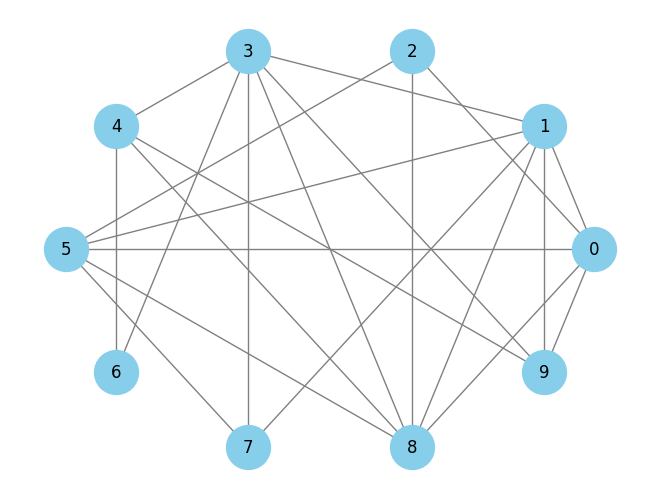

In [3]:
G = nx.erdos_renyi_graph(10, 0.4)#nx.Graph()
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

### Watts-Strogatz small world graph
#### nodes, starting with a ring lattice with each node connected to k nearest neighbors, and then edges are rewired with probability p.

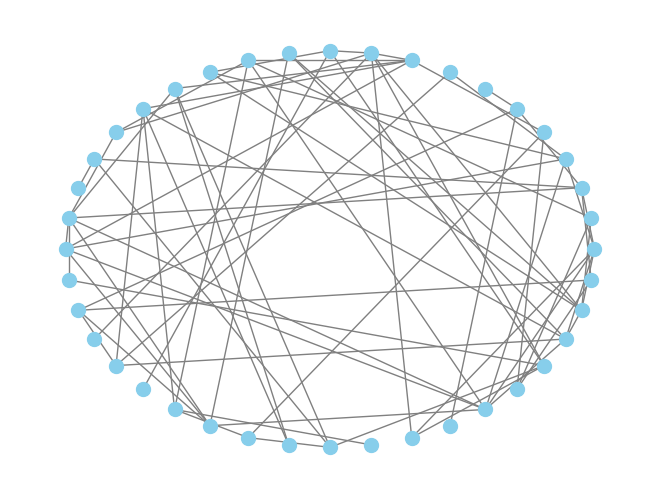

In [4]:

G = nx.erdos_renyi_graph(40, 0.1)#nx.Graph()
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

### Barbasi Albert Graph
#### Generates a graph by adding nodes one at a time, connecting each new node to m existing nodes with a probability proportional to their degree.


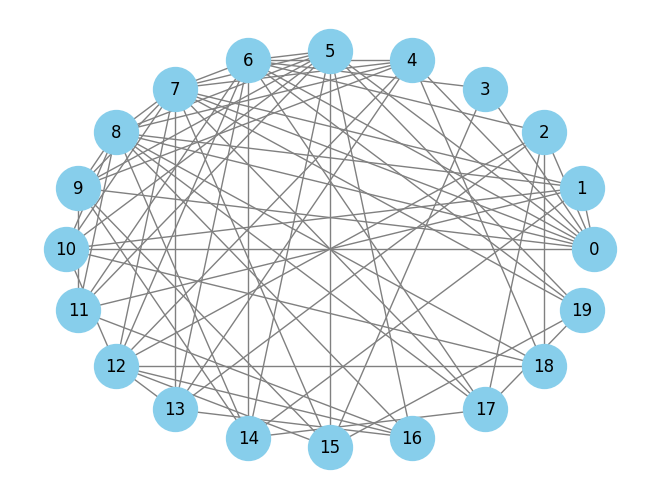

In [5]:
G = nx.barabasi_albert_graph(n=20, m=5)
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

### 2d Grid

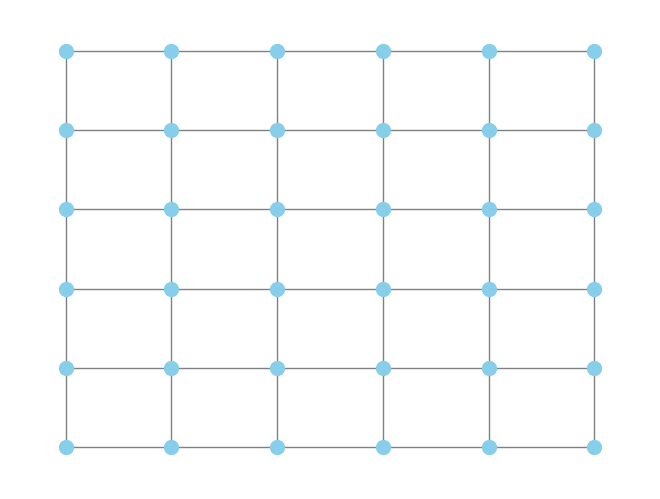

In [6]:
G = nx.grid_2d_graph(m=6, n=6)
pos = {(x, y): (y, -x) for x, y in G.nodes()} 
#pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G,pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

## Some other grid

In [7]:
def hexagonal_lattice_graph(n):
    G = nx.Graph()
    for x in range(-n+1, n):
        for y in range(-n+1, n):
            z = -x - y
            if -n < z and z < n:
                G.add_node((x, y, z))
    for node in G.nodes():
        x, y, z = node
        neighbors = [
            (x+1, y-1, z),
            (x+1, y, z-1),
            (x, y+1, z-1),
            (x-1, y+1, z),
            (x-1, y, z+1),
            (x, y-1, z+1)
        ]
        for neighbor in neighbors:
            if neighbor in G.nodes():
                G.add_edge(node, neighbor)
    return G



In [8]:
def hexagonal_positions(G):
    pos = dict()
    for node in G.nodes():
        x, y, z = node
        pos[node] = (1.5*x, np.sqrt(3) * (y + x/2))
    return pos


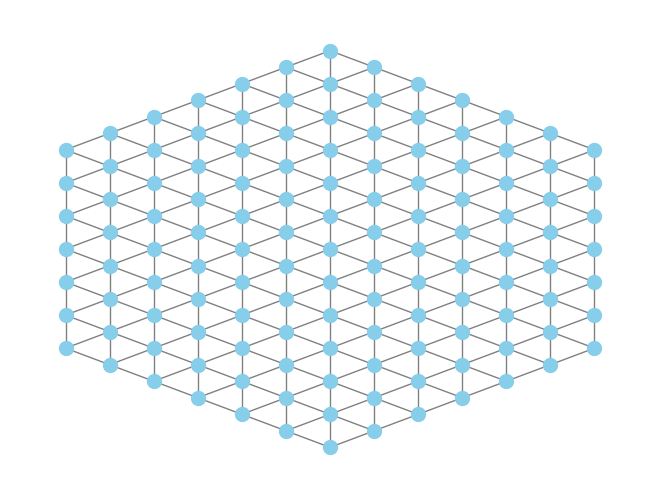

In [38]:
G = hexagonal_lattice_graph(7)
pos = hexagonal_positions(G)
nx.draw(G,pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

In [8]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Check if a graph is bipartite

In [10]:
def bipartite_sequence(G):
    nodes=list(G.nodes)
    #random.shuffle(nodes)
    edges=list(G.edges)
    if nodes==[]:
        return "The graph has no nodes"
    painted=[]
    remaining=nodes.copy()
    new_generation=[nodes[0]]
    ans=[]
    while remaining:
        if new_generation==[]:
            new_generation=[remaining[0]]
        ans.append(new_generation)
        remaining=[node for node in remaining if node not in new_generation]
        new=[]
        for node in new_generation:
            for neighbor in list(G.neighbors(node)):
                if neighbor in remaining:
                    new.append(neighbor)
        new_generation=list(set(new))
    return ans





In [10]:
bipartite_sequence(nx.erdos_renyi_graph(10,0.3))

[[0], [8, 3, 4, 7], [1, 2, 5, 6, 9]]

In [11]:
def make_bipartite_frames(G):
    
    
    sequence=bipartite_sequence(G)
    K=len(sequence)
    black=dict()
    ans=[black]
    for node in list(G.nodes()):
        black[node]="black"
    for i in range(K+1):
        new=black.copy()
        for j in range(i):
            for node in sequence[j]:
                new[node]=colors[j%2]
        ans.append(new)
    edge_colors=dict()
    for edge in list(G.edges()):
        edge_colors[edge]="black"
    final=ans[-1]
    ans=[(item,edge_colors.copy()) for item in ans]
    for edge in list(G.edges()):
        edge_colors[edge]="lime"
        if final[edge[0]]==final[edge[1]]:
            edge_colors[edge]="darkorange"
        ans.append((final,edge_colors.copy()))
    return ans




In [185]:
G=nx.erdos_renyi_graph(10,0.3)

In [52]:
bipartite_sequence(G)

[[0],
 [3],
 [1, 17, 7],
 [6, 8, 12, 14, 15, 18],
 [2, 5, 10, 11, 13, 16, 19],
 [9, 4]]

In [53]:
make_bipartite_frames(G)[0][1]

{(0, 3): 'black',
 (1, 3): 'black',
 (1, 6): 'black',
 (1, 12): 'black',
 (1, 17): 'black',
 (2, 9): 'black',
 (2, 13): 'black',
 (2, 14): 'black',
 (2, 18): 'black',
 (3, 7): 'black',
 (3, 17): 'black',
 (4, 11): 'black',
 (5, 6): 'black',
 (5, 8): 'black',
 (5, 13): 'black',
 (6, 12): 'black',
 (6, 13): 'black',
 (7, 18): 'black',
 (8, 11): 'black',
 (8, 13): 'black',
 (8, 17): 'black',
 (8, 19): 'black',
 (9, 16): 'black',
 (10, 15): 'black',
 (10, 19): 'black',
 (11, 14): 'black',
 (12, 13): 'black',
 (12, 16): 'black',
 (12, 18): 'black',
 (12, 19): 'black',
 (13, 16): 'black',
 (13, 18): 'black',
 (14, 17): 'black',
 (14, 18): 'black',
 (15, 17): 'black'}

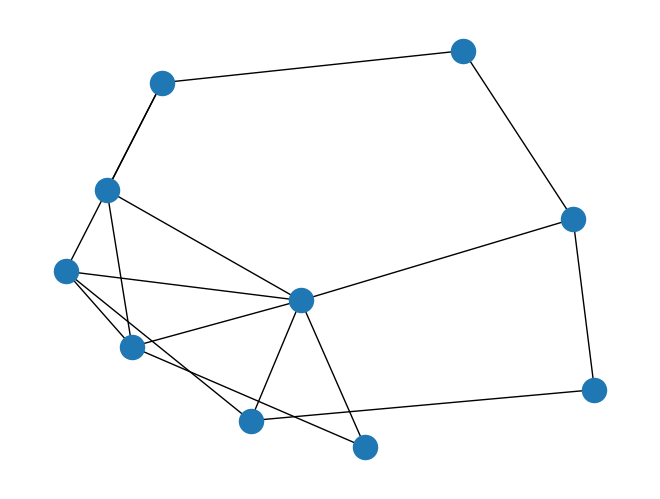

In [144]:
nx.draw(G)

In [12]:
make_bipartite_frames(G)[-1]

({(0, 0): 'cyan',
  (0, 1): 'magenta',
  (0, 2): 'cyan',
  (0, 3): 'magenta',
  (0, 4): 'cyan',
  (0, 5): 'magenta',
  (1, 0): 'magenta',
  (1, 1): 'cyan',
  (1, 2): 'magenta',
  (1, 3): 'cyan',
  (1, 4): 'magenta',
  (1, 5): 'cyan',
  (2, 0): 'cyan',
  (2, 1): 'magenta',
  (2, 2): 'cyan',
  (2, 3): 'magenta',
  (2, 4): 'cyan',
  (2, 5): 'magenta',
  (3, 0): 'magenta',
  (3, 1): 'cyan',
  (3, 2): 'magenta',
  (3, 3): 'cyan',
  (3, 4): 'magenta',
  (3, 5): 'cyan',
  (4, 0): 'cyan',
  (4, 1): 'magenta',
  (4, 2): 'cyan',
  (4, 3): 'magenta',
  (4, 4): 'cyan',
  (4, 5): 'magenta',
  (5, 0): 'magenta',
  (5, 1): 'cyan',
  (5, 2): 'magenta',
  (5, 3): 'cyan',
  (5, 4): 'magenta',
  (5, 5): 'cyan'},
 {((0, 0), (1, 0)): 'lime',
  ((0, 0), (0, 1)): 'lime',
  ((0, 1), (1, 1)): 'lime',
  ((0, 1), (0, 2)): 'lime',
  ((0, 2), (1, 2)): 'lime',
  ((0, 2), (0, 3)): 'lime',
  ((0, 3), (1, 3)): 'lime',
  ((0, 3), (0, 4)): 'lime',
  ((0, 4), (1, 4)): 'lime',
  ((0, 4), (0, 5)): 'lime',
  ((0, 5), (1, 5)

In [118]:
G=nx.erdos_renyi_graph(10,0.3)

In [13]:
make_bipartite_frames(G)[0][1]

{((0, 0), (1, 0)): 'black',
 ((0, 0), (0, 1)): 'black',
 ((0, 1), (1, 1)): 'black',
 ((0, 1), (0, 2)): 'black',
 ((0, 2), (1, 2)): 'black',
 ((0, 2), (0, 3)): 'black',
 ((0, 3), (1, 3)): 'black',
 ((0, 3), (0, 4)): 'black',
 ((0, 4), (1, 4)): 'black',
 ((0, 4), (0, 5)): 'black',
 ((0, 5), (1, 5)): 'black',
 ((1, 0), (2, 0)): 'black',
 ((1, 0), (1, 1)): 'black',
 ((1, 1), (2, 1)): 'black',
 ((1, 1), (1, 2)): 'black',
 ((1, 2), (2, 2)): 'black',
 ((1, 2), (1, 3)): 'black',
 ((1, 3), (2, 3)): 'black',
 ((1, 3), (1, 4)): 'black',
 ((1, 4), (2, 4)): 'black',
 ((1, 4), (1, 5)): 'black',
 ((1, 5), (2, 5)): 'black',
 ((2, 0), (3, 0)): 'black',
 ((2, 0), (2, 1)): 'black',
 ((2, 1), (3, 1)): 'black',
 ((2, 1), (2, 2)): 'black',
 ((2, 2), (3, 2)): 'black',
 ((2, 2), (2, 3)): 'black',
 ((2, 3), (3, 3)): 'black',
 ((2, 3), (2, 4)): 'black',
 ((2, 4), (3, 4)): 'black',
 ((2, 4), (2, 5)): 'black',
 ((2, 5), (3, 5)): 'black',
 ((3, 0), (4, 0)): 'black',
 ((3, 0), (3, 1)): 'black',
 ((3, 1), (4, 1)): '

In [14]:
def animate_bipartite(Graph,posfunction=nx.circular_layout):
    G=Graph.copy()
    #frames=greedy_color_graph(G,random_order=random_order,position_function=position_function,with_labels=with_labels)["frames"]
    pos = posfunction(G)  # positions for all nodes. There are other possibilities fo layout...
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('cornsilk')
    fig.set_facecolor('cornsilk')
    black=dict()

    frames=make_bipartite_frames(G)
    #nx.draw(G,pos=pos)
    def update(frame):
        ax.clear()
        node_colors=[frame[0][node] for node in G.nodes]
        edge_colors = [frame[1][edge] for edge in G.edges()]
        nx.draw(G, pos=pos, nodelist=G.nodes, node_color=node_colors,edge_color=edge_colors,width=2,ax=ax)
        plt.title("Algorithm for two-coloring")  
        #counter_text = ax.text(0.7, 0, f"Used colors = {used_colors}", transform=ax.transAxes, ha='left', va='top',color="black",fontsize=13)# Make a counter

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)
    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()
    # Display the animation
    return(HTML(ani_jshtml))

In [255]:
make_bipartite_frames(G)[0][1]

{(0, 2): 'green',
 (1, 4): 'green',
 (1, 5): 'green',
 (1, 11): 'green',
 (1, 14): 'green',
 (1, 15): 'orange',
 (1, 20): 'orange',
 (2, 9): 'green',
 (2, 11): 'green',
 (2, 17): 'green',
 (2, 19): 'green',
 (3, 4): 'green',
 (3, 17): 'green',
 (3, 20): 'orange',
 (4, 27): 'orange',
 (5, 21): 'green',
 (6, 22): 'green',
 (8, 26): 'green',
 (9, 16): 'green',
 (9, 23): 'green',
 (10, 13): 'orange',
 (10, 20): 'green',
 (10, 21): 'green',
 (11, 19): 'orange',
 (11, 20): 'green',
 (11, 26): 'green',
 (12, 18): 'green',
 (12, 22): 'green',
 (13, 26): 'green',
 (14, 27): 'orange',
 (15, 17): 'green',
 (16, 25): 'green',
 (16, 27): 'green',
 (17, 24): 'green',
 (18, 25): 'green',
 (20, 24): 'orange',
 (21, 25): 'green',
 (22, 29): 'green',
 (26, 29): 'green'}

In [132]:
nx.draw(G,color_edge)

[[3], [1, 6], [0, 9, 2, 8], [4, 5, 7]]

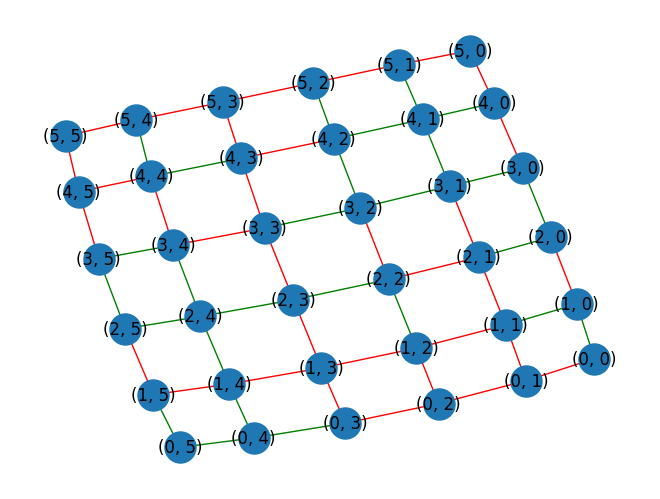

In [15]:
edge_colors = [random.choice(["red","green"]) for u, v in G.edges()]  # Get edge colors from attributes
nx.draw(G, with_labels=True, node_size=500, edge_color=edge_colors)

In [265]:
make_bipartite_frames(G)[-1]

({0: 'cyan',
  1: 'magenta',
  2: 'magenta',
  3: 'magenta',
  4: 'cyan',
  5: 'cyan',
  6: 'cyan',
  7: 'magenta',
  8: 'cyan',
  9: 'cyan',
  10: 'cyan',
  11: 'cyan',
  12: 'cyan',
  13: 'cyan',
  14: 'cyan',
  15: 'magenta',
  16: 'magenta',
  17: 'cyan',
  18: 'magenta',
  19: 'cyan',
  20: 'magenta',
  21: 'magenta',
  22: 'magenta',
  23: 'magenta',
  24: 'magenta',
  25: 'cyan',
  26: 'magenta',
  27: 'cyan',
  28: 'cyan',
  29: 'cyan'},
 {(0, 2): 'lime',
  (1, 4): 'lime',
  (1, 5): 'lime',
  (1, 11): 'lime',
  (1, 14): 'lime',
  (1, 15): 'darkorange',
  (1, 20): 'darkorange',
  (2, 9): 'lime',
  (2, 11): 'lime',
  (2, 17): 'lime',
  (2, 19): 'lime',
  (3, 4): 'lime',
  (3, 17): 'lime',
  (3, 20): 'darkorange',
  (4, 27): 'darkorange',
  (5, 21): 'lime',
  (6, 22): 'lime',
  (8, 26): 'lime',
  (9, 16): 'lime',
  (9, 23): 'lime',
  (10, 13): 'darkorange',
  (10, 20): 'lime',
  (10, 21): 'lime',
  (11, 19): 'darkorange',
  (11, 20): 'lime',
  (11, 26): 'lime',
  (12, 18): 'lime',

In [208]:
len(make_bipartite_frames(G))

15

In [67]:
G=nx.erdos_renyi_graph(20,0.2)

In [61]:
H=nx.complete_bipartite_graph(8,3)

In [47]:
C=nx.cycle_graph(17)

In [18]:
chess=nx.grid_2d_graph(5,5)

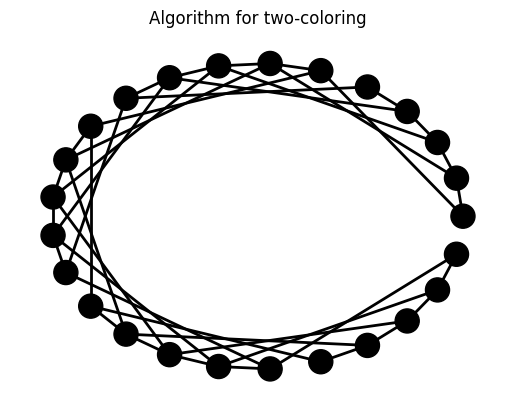

In [19]:
animate_bipartite(chess)